 ## 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。

 - Home Creditはどのような企業？
 - このコンペティションでは何を予測する？
 - それを予測することで企業が得られるメリットは何？

多くの人々は、信用履歴が不十分または存在しないため、融資を受けるのに苦労しています。 そして、残念ながら、この人口は信頼できない貸し手によってしばしば利用されます。

ホームクレジットグループ

Home Creditは、前向きで安全な借入体験を提供することにより、銀行のない人々の金融包摂の拡大に努めています。 この十分なサービスを受けていない人々が確実に融資を受けられるようにするために、Home Creditは電話会社や取引情報を含むさまざまな代替データを使用して、クライアントの返済能力を予測します。

現在、Home Creditはさまざまな統計的手法や機械学習手法を使用してこれらの予測を行っていますが、Kagglersはデータの可能性を最大限に引き出すためにカグラーに挑戦しています。 そうすることで、返済可能なクライアントが拒否されず、ローンがクライアントの成功を支援する元本、満期、返済カレンダーが提供されることが保証されます。

 ## ①Home Creditはどのような企業？

 - Home Credit: 1997年にチェコ共和国で設立され、オランダに本社を置く国際的なノンバンク金融機関です。同社は10か国で事業を展開しており、主に信用履歴がほとんどまたはまったくない人々への融資に重点を置いています。

 ## ②このコンペティションでは何を予測する？
- クライアントの返済能力(TARGET)

 ## ③それを予測することで企業が得られるメリットは何？
 - 顧客拡大（返済可能な顧客が融資の拒否をされない）
 - 売上拡大
 - 貸倒の削減

## 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。

 - .head()、.info()、describe()などを使う
 - 欠損値の有無を見る
 - クラスごとのデータ数をグラフに出す
 - それぞれ結果に対する説明や考察も行ってください。

 ## ①.head()、.info()、describe()などを使う

In [10]:
import pandas as pd

application = pd.read_csv('application_train.csv.zip')

In [11]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [13]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [14]:
application.shape

(307511, 122)

In [15]:
application["TARGET"]

0         1
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        1
27        0
28        0
29        0
         ..
307481    1
307482    0
307483    0
307484    0
307485    0
307486    0
307487    0
307488    0
307489    1
307490    0
307491    0
307492    0
307493    0
307494    0
307495    0
307496    0
307497    0
307498    0
307499    0
307500    0
307501    0
307502    0
307503    0
307504    0
307505    0
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

 ## ②欠損値の有無を見る

In [16]:
import missingno as msno
%matplotlib inline

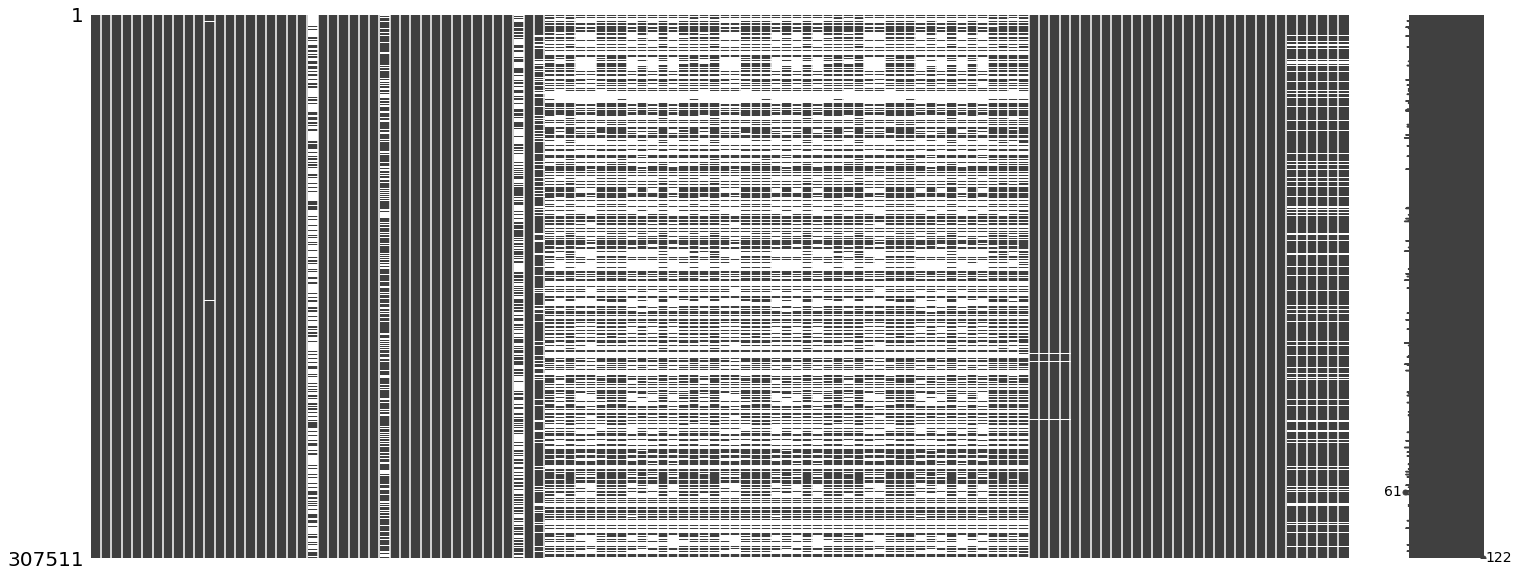

In [17]:
msno.matrix(application)

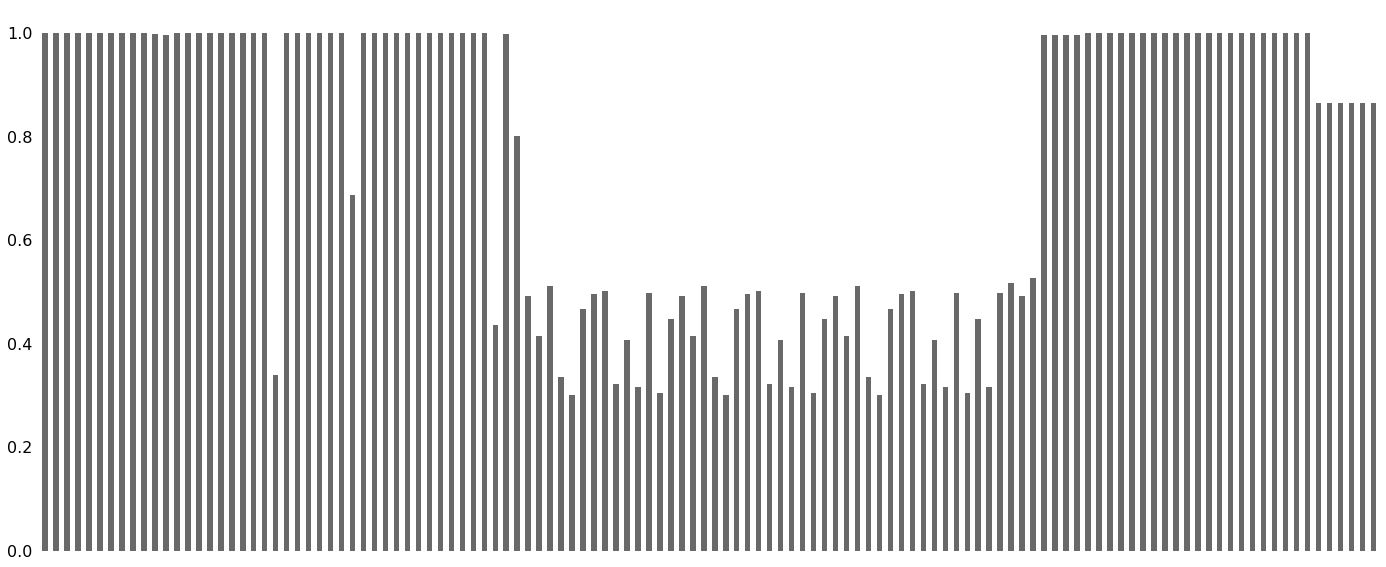

In [18]:
msno.bar(application)

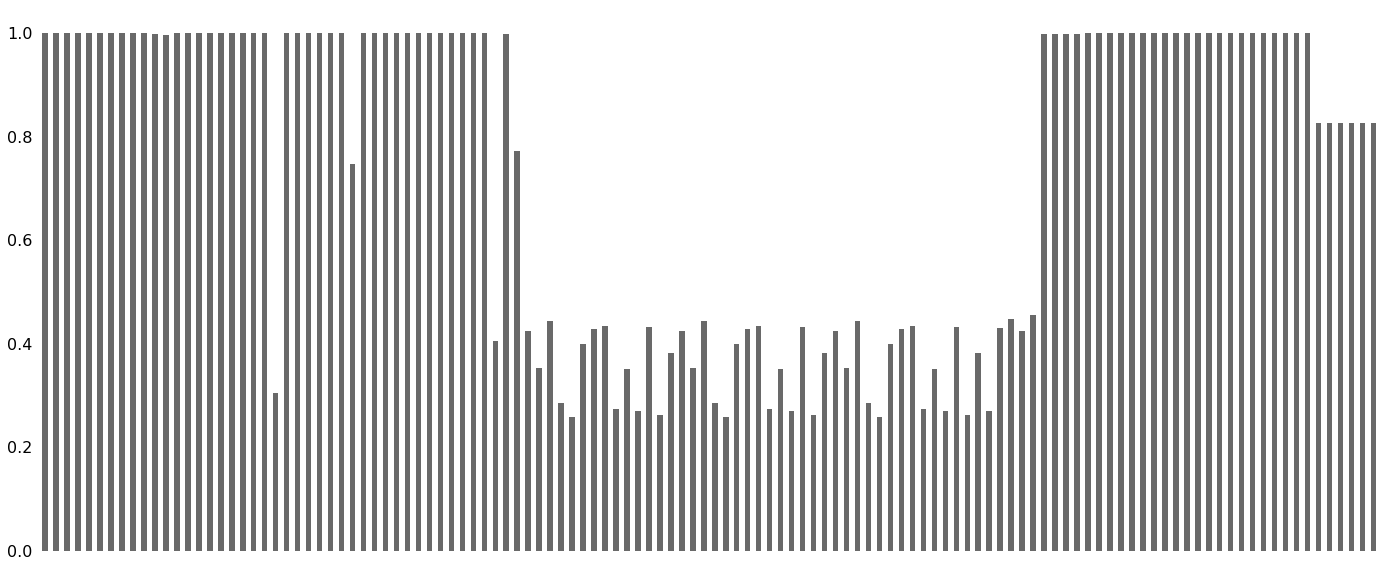

In [19]:
msno.bar(application[application["TARGET"] == 1])

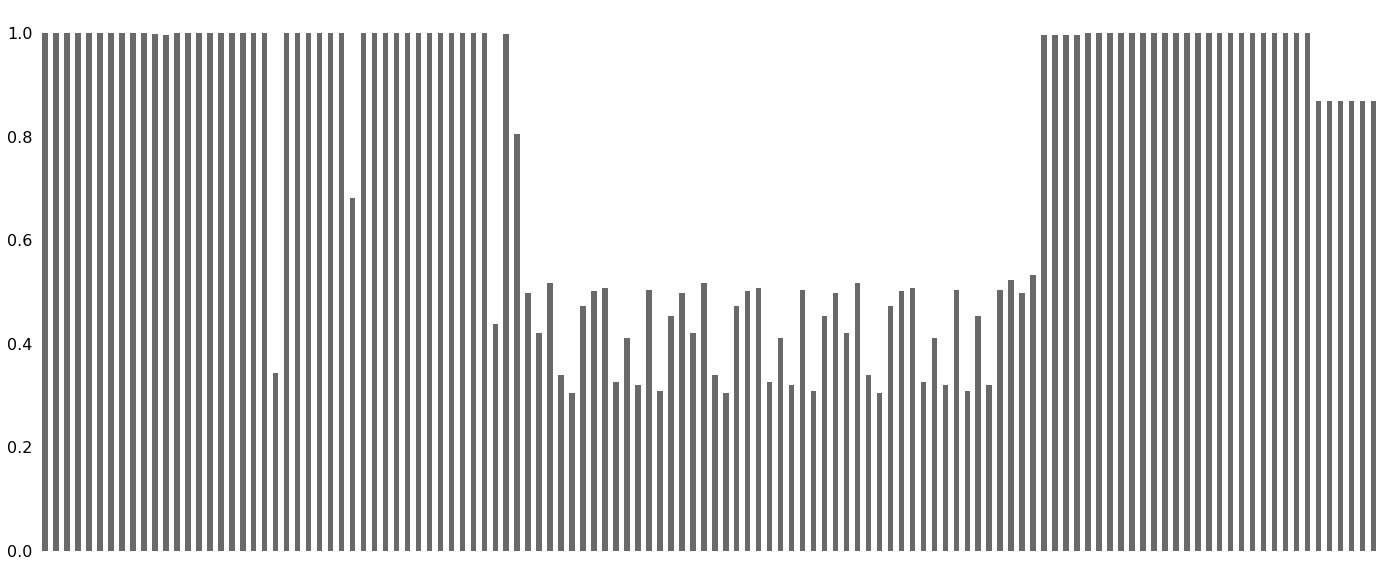

In [20]:
msno.bar(application[application["TARGET"] == 0])

In [21]:
application.isnull().sum() 

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

 ## ③クラスごとのデータ数をグラフに出す

<BarContainer object of 2 artists>

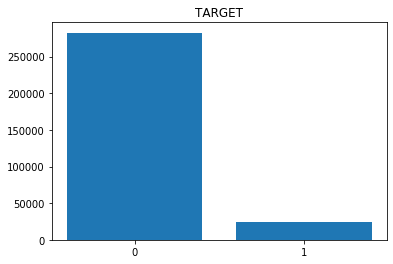

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
a = len(application[application["TARGET"] == 1])
b = len(application[application["TARGET"] == 0])
y = [a,b]
x = [1,0]
plt.title("TARGET")
plt.bar(x, y,tick_label= x)

In [23]:
len(application[application["TARGET"] == 1])

24825

In [24]:
for i in application.columns:
    print(i, application[i].isnull().sum(),sep=" : ") 

SK_ID_CURR : 0
TARGET : 0
NAME_CONTRACT_TYPE : 0
CODE_GENDER : 0
FLAG_OWN_CAR : 0
FLAG_OWN_REALTY : 0
CNT_CHILDREN : 0
AMT_INCOME_TOTAL : 0
AMT_CREDIT : 0
AMT_ANNUITY : 12
AMT_GOODS_PRICE : 278
NAME_TYPE_SUITE : 1292
NAME_INCOME_TYPE : 0
NAME_EDUCATION_TYPE : 0
NAME_FAMILY_STATUS : 0
NAME_HOUSING_TYPE : 0
REGION_POPULATION_RELATIVE : 0
DAYS_BIRTH : 0
DAYS_EMPLOYED : 0
DAYS_REGISTRATION : 0
DAYS_ID_PUBLISH : 0
OWN_CAR_AGE : 202929
FLAG_MOBIL : 0
FLAG_EMP_PHONE : 0
FLAG_WORK_PHONE : 0
FLAG_CONT_MOBILE : 0
FLAG_PHONE : 0
FLAG_EMAIL : 0
OCCUPATION_TYPE : 96391
CNT_FAM_MEMBERS : 2
REGION_RATING_CLIENT : 0
REGION_RATING_CLIENT_W_CITY : 0
WEEKDAY_APPR_PROCESS_START : 0
HOUR_APPR_PROCESS_START : 0
REG_REGION_NOT_LIVE_REGION : 0
REG_REGION_NOT_WORK_REGION : 0
LIVE_REGION_NOT_WORK_REGION : 0
REG_CITY_NOT_LIVE_CITY : 0
REG_CITY_NOT_WORK_CITY : 0
LIVE_CITY_NOT_WORK_CITY : 0
ORGANIZATION_TYPE : 0
EXT_SOURCE_1 : 173378
EXT_SOURCE_2 : 660
EXT_SOURCE_3 : 60965
APARTMENTS_AVG : 156061
BASEMENTAREA_AVG 

## 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。
<br>
 - 「TARGET」は、０のデータが多く、１のデータが非常に少ない。データに偏りが見られる。
 - 数値データに、欠損値が非常に多い。
 - 「TARGET」との相関係数の絶対値が、０.２を超えるデータは見られない。「TARGET」は、他の特徴量とほぼ無相関であると考えられる。
 - このデータには、「TARGET」の傾向を説明できる特徴量はみられない。
 - 他のデータとマージすることで、「TARGET」の傾向を説明できる特徴量を追加する必要がある。

 ## 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。考察を伴う表やグラフを 15個以上 作成してください。

探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

In [25]:
#数値データのみを抽出し、application2に格納

application2 = application
list_str=[]

for i in application.columns:
    if application[i].dtypes == 'O':
        application2 = application2.drop([i], axis = 1)
        list_str.append(i)

In [26]:
application2.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


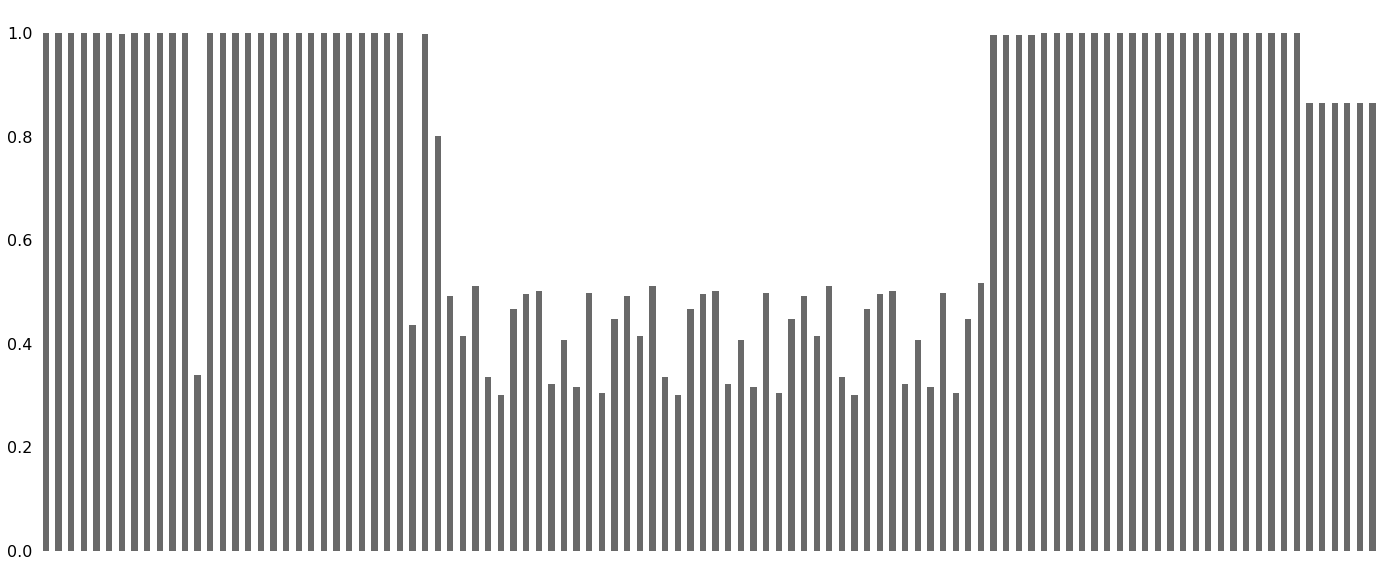

In [27]:
#数値データには、nullデータが多い。　
msno.bar(application2)

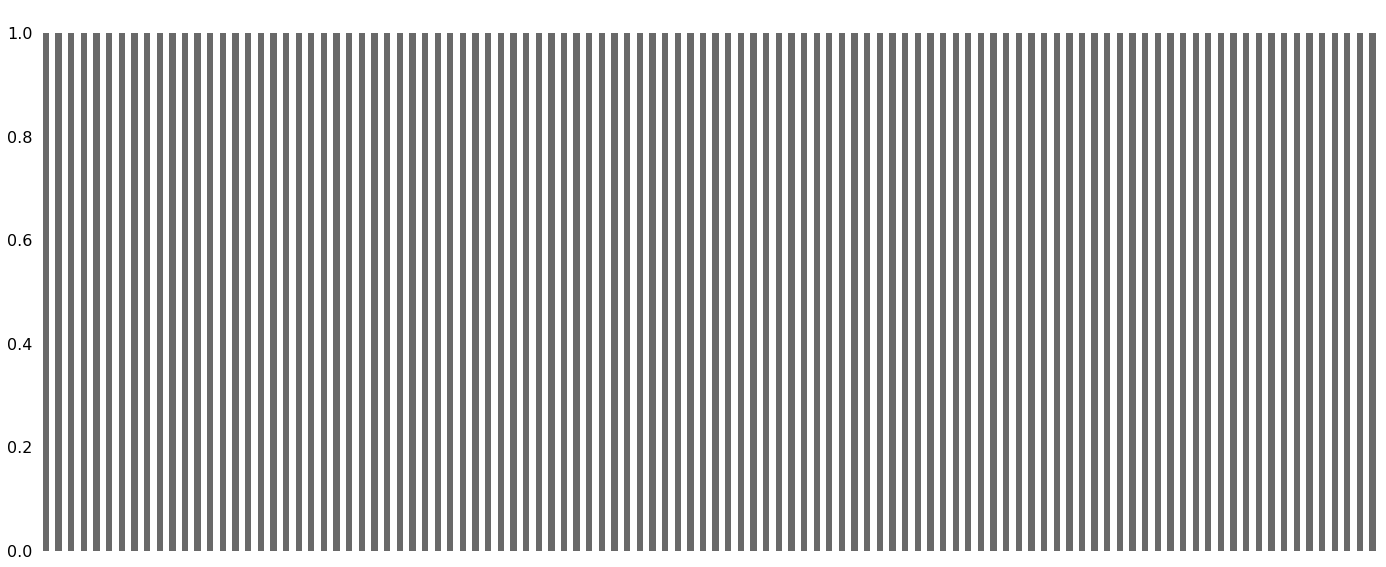

In [28]:
# 欠損値を０に置換する。
import numpy as np
application2 = application2.replace(np.nan,0)
msno.bar(application2)

In [29]:
# カテゴリーデータをダミー変数化
application_str = application[list_str]
application_dummy = pd.get_dummies(application_str)
application_dummy.head(10)

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,1,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


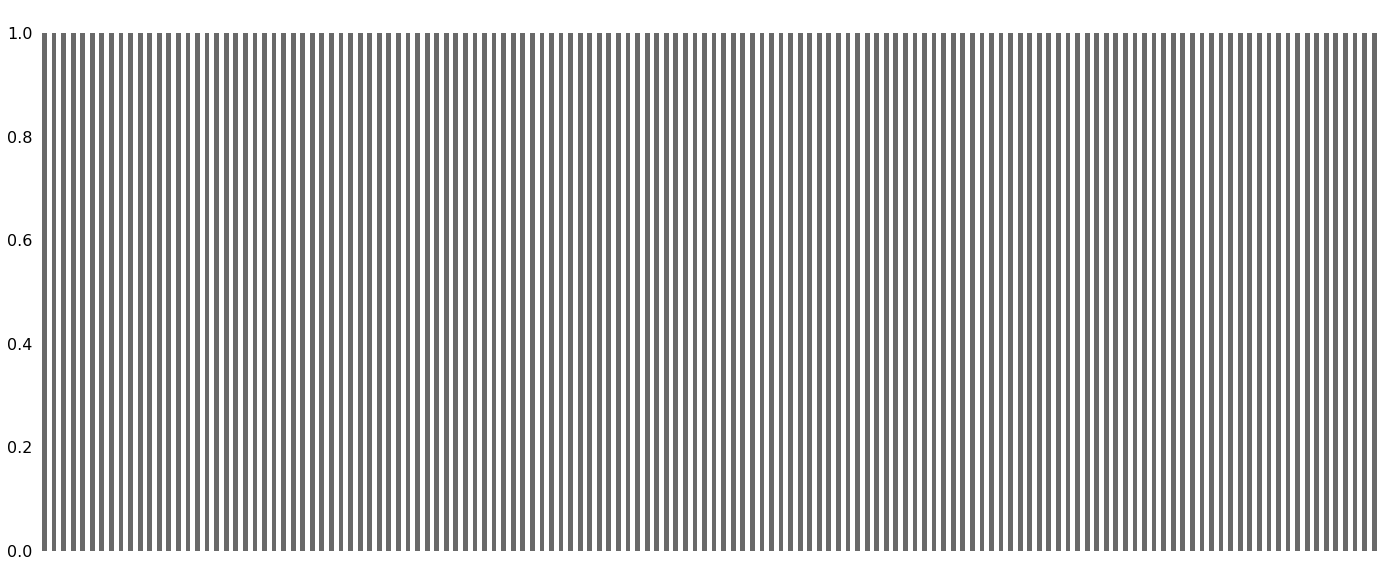

In [30]:
# ダミー変数化したカテゴリーデータは、欠損値がない。
msno.bar(application_dummy)

In [31]:
#ダミー変数化したカテゴリーデータと、欠損値を０で置換した数値データを結合
application_mix = pd.concat([application2, application_dummy], axis=1)
application_mix.head(10)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0
5,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,...,0,0,0,0,0,0,0,0,0,0
6,100009,0,1,171000.0,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,...,0,0,0,0,0,0,0,0,0,0
7,100010,0,0,360000.0,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,...,0,0,0,0,0,0,0,0,0,0
8,100011,0,0,112500.0,1019610.0,33826.5,913500.0,0.018634,-20099,365243,...,0,0,0,0,0,0,0,0,0,0
9,100012,0,0,135000.0,405000.0,20250.0,405000.0,0.019689,-14469,-2019,...,0,0,0,0,0,0,0,0,0,0


In [32]:
application_mix.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000407,-0.000390,0.000849,-0.001500,0.001366,...,0.000553,0.002073,-0.000976,0.000072,-0.001396,0.002300,-1.280782e-03,-0.000270,0.000510,0.002549
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012794,-0.039565,-0.037227,0.078239,-0.044932,...,0.000982,-0.006777,-0.001713,-0.009384,0.000628,-0.033119,-1.265666e-02,0.007946,-0.042201,0.004829
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021414,-0.002008,-0.025573,0.330938,-0.239818,...,-0.001830,-0.005272,-0.000709,0.001607,-0.002032,-0.020892,-2.508821e-02,0.011036,-0.038644,0.004525
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191639,0.159664,0.074796,0.027261,-0.064223,...,0.000718,0.011696,0.006149,0.023886,0.003886,0.032753,1.652333e-02,-0.003369,0.050174,-0.002894
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770080,0.986687,0.099738,-0.055436,-0.066838,...,0.000869,0.014314,0.007987,0.027255,0.005799,0.046644,9.756049e-03,-0.007373,0.058256,-0.004308
AMT_ANNUITY,-0.000407,-0.012794,0.021414,0.191639,0.770080,1.000000,0.775063,0.118345,0.009419,-0.104290,...,0.002171,0.015601,0.010083,0.035321,0.005973,0.054991,9.165928e-03,-0.007701,0.068142,-0.003903
AMT_GOODS_PRICE,-0.000390,-0.039565,-0.002008,0.159664,0.986687,0.775063,1.000000,0.103625,-0.053943,-0.064419,...,0.000726,0.013545,0.010003,0.028248,0.005968,0.049862,1.285371e-02,-0.009269,0.062913,-0.004835
REGION_POPULATION_RELATIVE,0.000849,-0.037227,-0.025573,0.074796,0.099738,0.118345,0.103625,1.000000,-0.029582,-0.003980,...,0.011212,0.078062,0.016288,0.045775,0.013435,0.092652,1.078225e-02,-0.056263,0.103513,-0.029932
DAYS_BIRTH,-0.001500,0.078239,0.330938,0.027261,-0.055436,0.009419,-0.053943,-0.029582,1.000000,-0.615864,...,0.000388,-0.006749,-0.000262,0.004421,-0.000690,-0.013597,-1.096440e-02,0.008758,-0.019852,0.005434
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.064223,-0.066838,-0.104290,-0.064419,-0.003980,-0.615864,1.000000,...,-0.001761,0.003691,-0.003692,-0.006892,-0.003120,-0.004193,-6.326739e-03,-0.002846,-0.010907,-0.003571


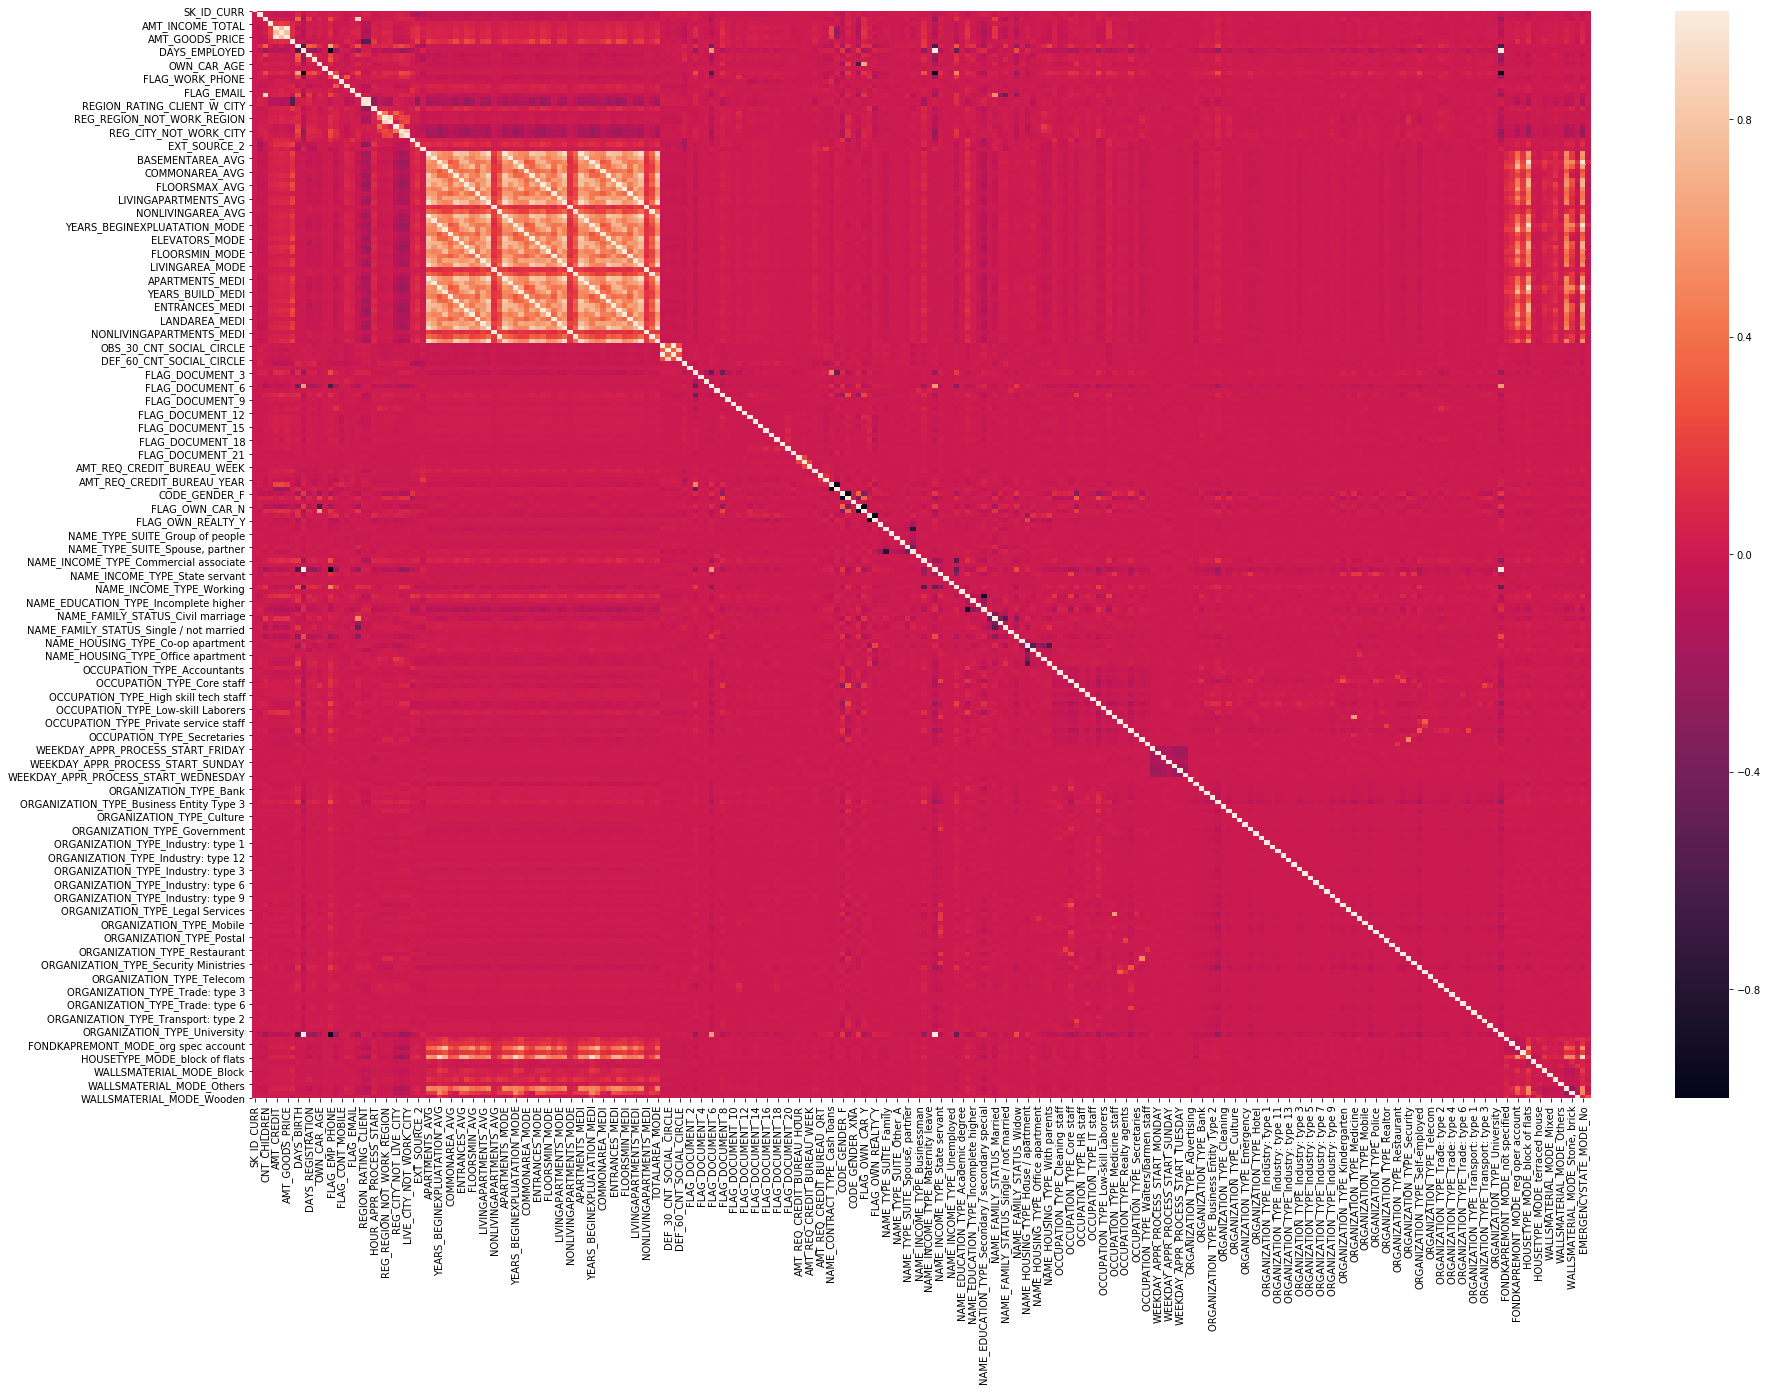

In [33]:
plt.figure(figsize=(30, 20))
sns.heatmap(application_mix.corr(), annot=False)

In [34]:
from scipy.stats import pearsonr

list_i = []
for i in application_mix.columns:
    a, b = pearsonr(application_mix[i],application_mix["TARGET"])
    print("{} :  {}".format(i,a)) 

SK_ID_CURR :  -0.0021084690181977193
TARGET :  1.0
CNT_CHILDREN :  0.019187133596270035
AMT_INCOME_TOTAL :  -0.00398186560120566
AMT_CREDIT :  -0.030369286461429734
AMT_ANNUITY :  -0.012794036703988614
AMT_GOODS_PRICE :  -0.03956533747621201
REGION_POPULATION_RELATIVE :  -0.03722714854244523
DAYS_BIRTH :  0.07823930830982699
DAYS_EMPLOYED :  -0.04493166265773869
DAYS_REGISTRATION :  0.04197486283141716
DAYS_ID_PUBLISH :  0.05145717260705746
OWN_CAR_AGE :  0.002285352065967182
FLAG_MOBIL :  0.0005343955790282185
FLAG_EMP_PHONE :  0.04598221971659249
FLAG_WORK_PHONE :  0.028524322363217402
FLAG_CONT_MOBILE :  0.0003701268023489211
FLAG_PHONE :  -0.023806272330357387
FLAG_EMAIL :  -0.0017583834312544897
CNT_FAM_MEMBERS :  0.009312168432937314
REGION_RATING_CLIENT :  0.058899014945712556
REGION_RATING_CLIENT_W_CITY :  0.06089266756482353
HOUR_APPR_PROCESS_START :  -0.024165831430094372
REG_REGION_NOT_LIVE_REGION :  0.00557594452090841
REG_REGION_NOT_WORK_REGION :  0.006941907545371849
LIVE

In [35]:
#　「TARGET」との相関係数の絶対値が、０.２を超えるデータは見られない。
list_i = []
for i in application_mix.columns:
    a, b = pearsonr(application_mix[i],application_mix["TARGET"])
    if 0.05 < abs(a) :
        print("{},{}".format(i,a)) 
        
        
        

TARGET,1.0
DAYS_BIRTH,0.07823930830982699
DAYS_ID_PUBLISH,0.05145717260705746
REGION_RATING_CLIENT,0.058899014945712556
REGION_RATING_CLIENT_W_CITY,0.06089266756482353
REG_CITY_NOT_WORK_CITY,0.050994464368126484
EXT_SOURCE_1,-0.06469813333590466
EXT_SOURCE_2,-0.15902967651017433
EXT_SOURCE_3,-0.1195719284871247
DAYS_LAST_PHONE_CHANGE,0.05521723161673526
CODE_GENDER_F,-0.054704053178808124
CODE_GENDER_M,0.05471268197127131
NAME_INCOME_TYPE_Working,0.05748118481836567
NAME_EDUCATION_TYPE_Higher education,-0.05659264414096367


In [36]:
#　「TARGET」との相関係数の絶対値が、０.2を超えるデータは「EXT_SOURCE_2」と「EXT_SOURCE_3」の二つだけである。
list_i = []
for i in application_mix.columns:
    a, b = pearsonr(application_mix[i],application_mix["TARGET"])
    if 0.1 < abs(a) :
        print("{},{}".format(i,a)) 

TARGET,1.0
EXT_SOURCE_2,-0.15902967651017433
EXT_SOURCE_3,-0.1195719284871247
